# Country_wide_COVID 19

In [119]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
worldometer_df=pd.read_csv('worldometer_snapshots_April18_to_May18.csv',parse_dates=['Date'])
worldometer_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [121]:
population_df=pd.read_csv('population_structure_by_age_per_contry.csv')
population_df

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [122]:
#checking the datatype
worldometer_df.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [123]:
population_df.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [124]:
worldometer_df.shape

(6603, 9)

In [125]:
population_df.shape

(213, 4)

In [126]:
#checking null values
worldometer_df.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [127]:
population_df.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [128]:
worldometer_df=worldometer_df.merge(population_df,on='Country')
worldometer_df.shape

(6603, 12)

In [129]:
#checking null values
worldometer_df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [130]:
worldometer_df['Total Tests'].fillna(worldometer_df['Total Tests'].mean(),inplace=True)
worldometer_df['Total Cases'].fillna(worldometer_df['Total Cases'].mean(),inplace=True)
worldometer_df['Total Deaths'].fillna(worldometer_df['Total Deaths'].mean(),inplace=True)
worldometer_df['Total Recovered'].fillna(worldometer_df['Total Recovered'].mean(),inplace=True)
worldometer_df['Serious or Critical'].fillna(worldometer_df['Serious or Critical'].mean(),inplace=True)
worldometer_df['Active Cases'].fillna((worldometer_df['Total Cases']-worldometer_df['Total Deaths']-worldometer_df['Total Recovered']),inplace=True)
worldometer_df['Fraction age 0-14 years'].fillna(worldometer_df['Fraction age 0-14 years'].mean(),inplace=True)
worldometer_df['Fraction age 15-64 years'].fillna(worldometer_df['Fraction age 15-64 years'].mean(),inplace=True)
worldometer_df['Fraction age 65+ years'].fillna(worldometer_df['Fraction age 65+ years'].mean(),inplace=True)

In [131]:
worldometer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,6603.0,3.637913e+07,1.411537e+08,801.000,867268.000,6.859926e+06,2.546422e+07,1.439324e+09
Total Tests,6603.0,2.167252e+05,6.934856e+05,10.000,4733.000,5.419500e+04,2.167252e+05,1.230074e+07
Total Cases,6603.0,1.692968e+04,8.828521e+04,1.000,80.000,6.320000e+02,5.222500e+03,1.550294e+06
Total Deaths,6603.0,1.416252e+03,5.990992e+03,0.000,8.000,5.500000e+01,1.416252e+03,9.198100e+04
Total Recovered,6603.0,5.855424e+03,2.295552e+04,1.000,29.000,2.530000e+02,1.786500e+03,3.563830e+05
Serious or Critical,6603.0,3.867484e+02,1.309473e+03,1.000,7.000,1.370000e+02,3.867484e+02,1.867100e+04
Active Cases,6603.0,1.012260e+04,6.532952e+04,0.000,27.000,2.840000e+02,2.230500e+03,1.101930e+06
Fraction age 0-14 years,6603.0,2.760977e-01,9.676576e-02,0.115,0.191,2.760977e-01,3.350000e-01,5.020000e-01
Fraction age 15-64 years,6603.0,6.361091e-01,6.032011e-02,0.472,0.607,6.380000e-01,6.670000e-01,8.500000e-01
Fraction age 65+ years,6603.0,8.773068e-02,5.667580e-02,0.011,0.038,8.500000e-02,1.140000e-01,2.700000e-01


In [132]:
worldometer_df['month']=worldometer_df['Date'].dt.month
worldometer_df['year']=worldometer_df['Date'].dt.year
worldometer_df['day']=worldometer_df['Date'].dt.day

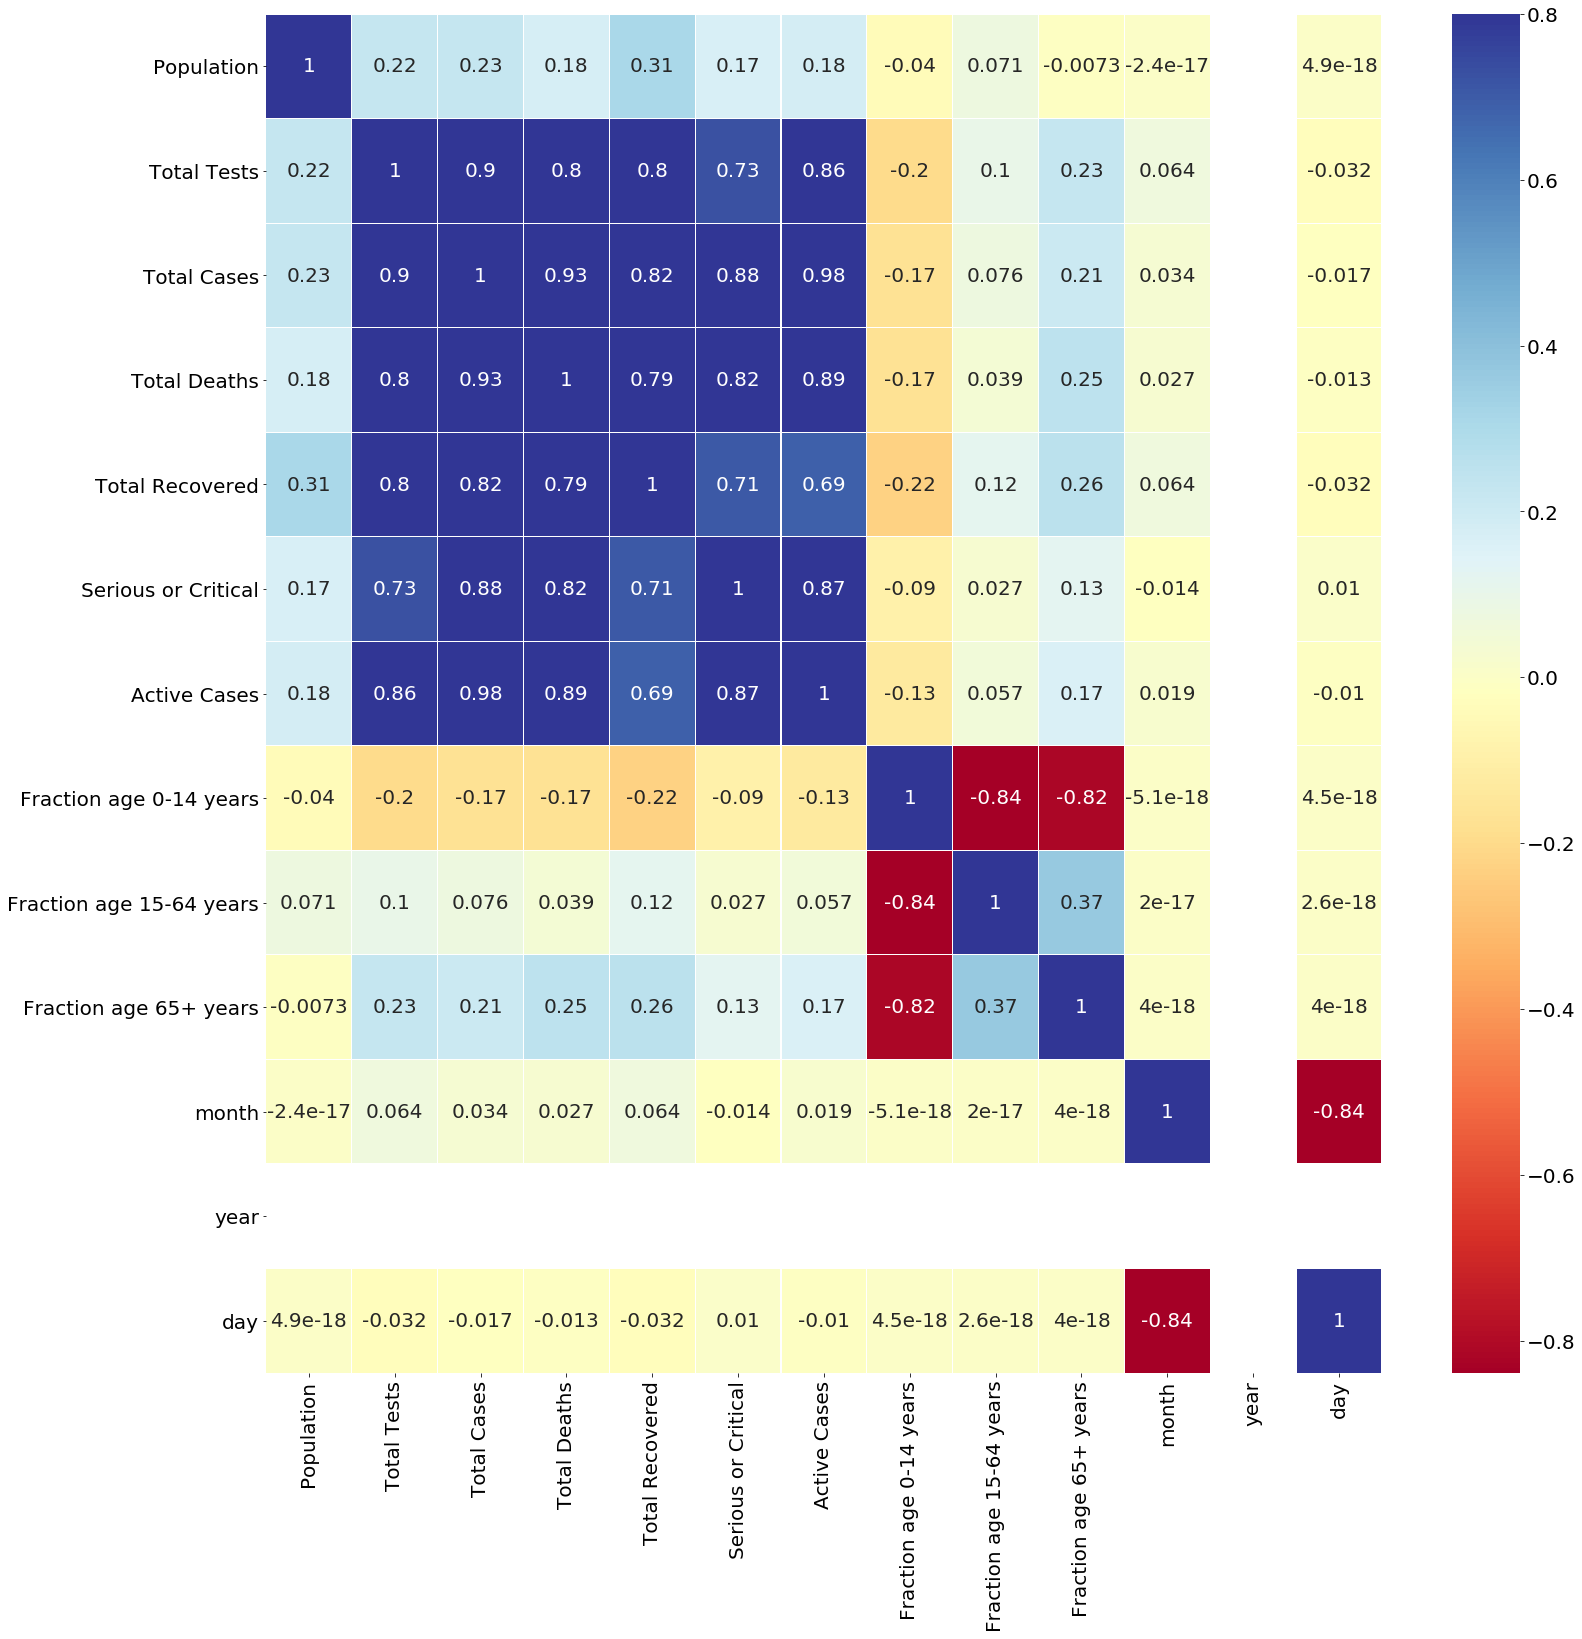

In [133]:
# Correlation Plot
corrmat = worldometer_df.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(25, 25))

#Draw the heatmap using seaborn
colormap = plt.cm.RdYlBu
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

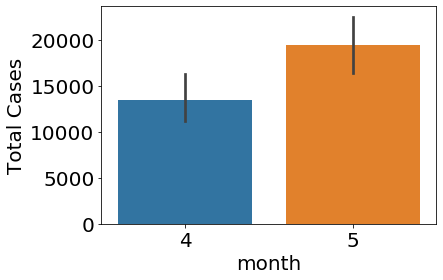

In [134]:
#total case during months of an year
sns.barplot(x='month',y='Total Cases',data=worldometer_df)
plt.show()

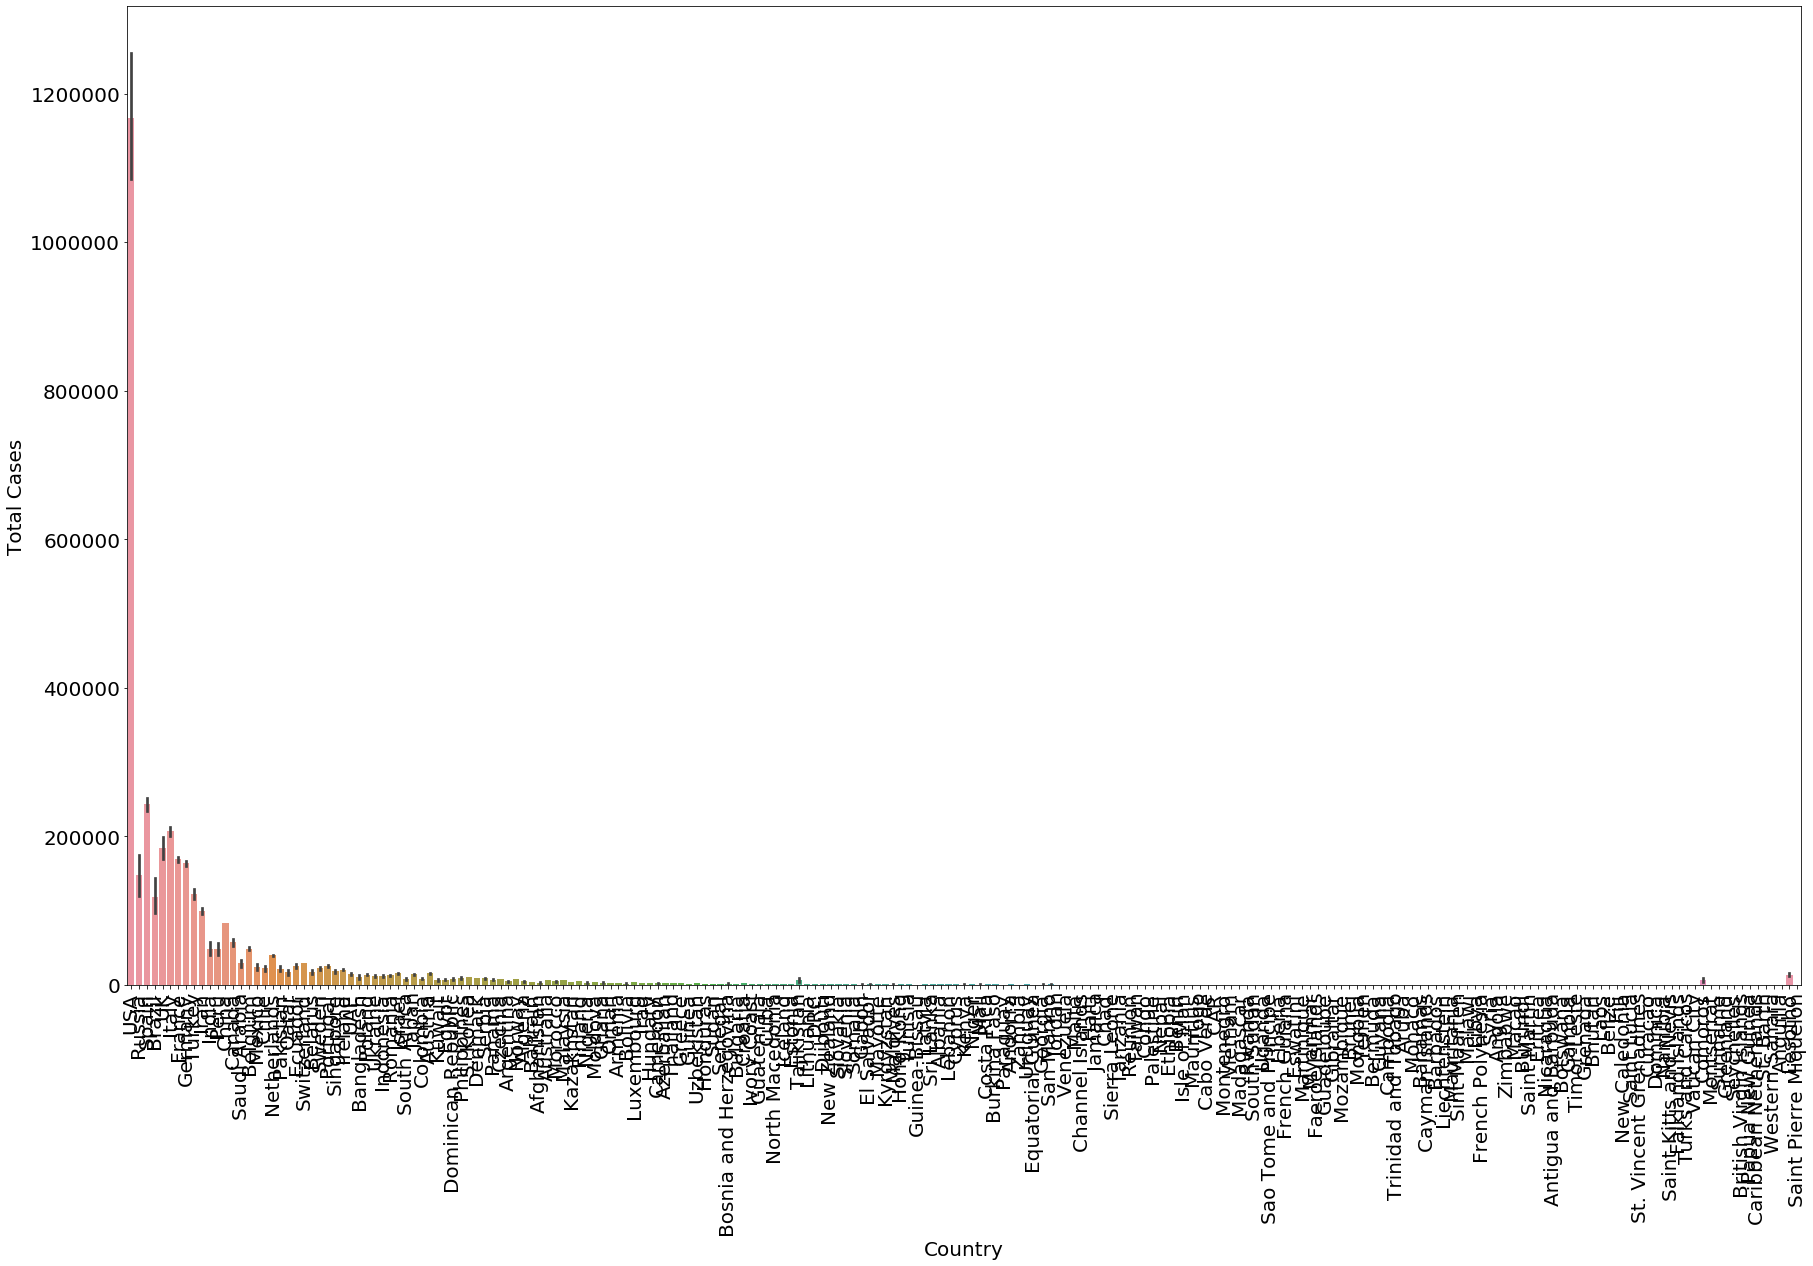

In [140]:
plt.figure(figsize=(30,18))
plt.xticks(rotation=90)
sns.barplot(x='Country',y='Total Cases' ,data=worldometer_df)

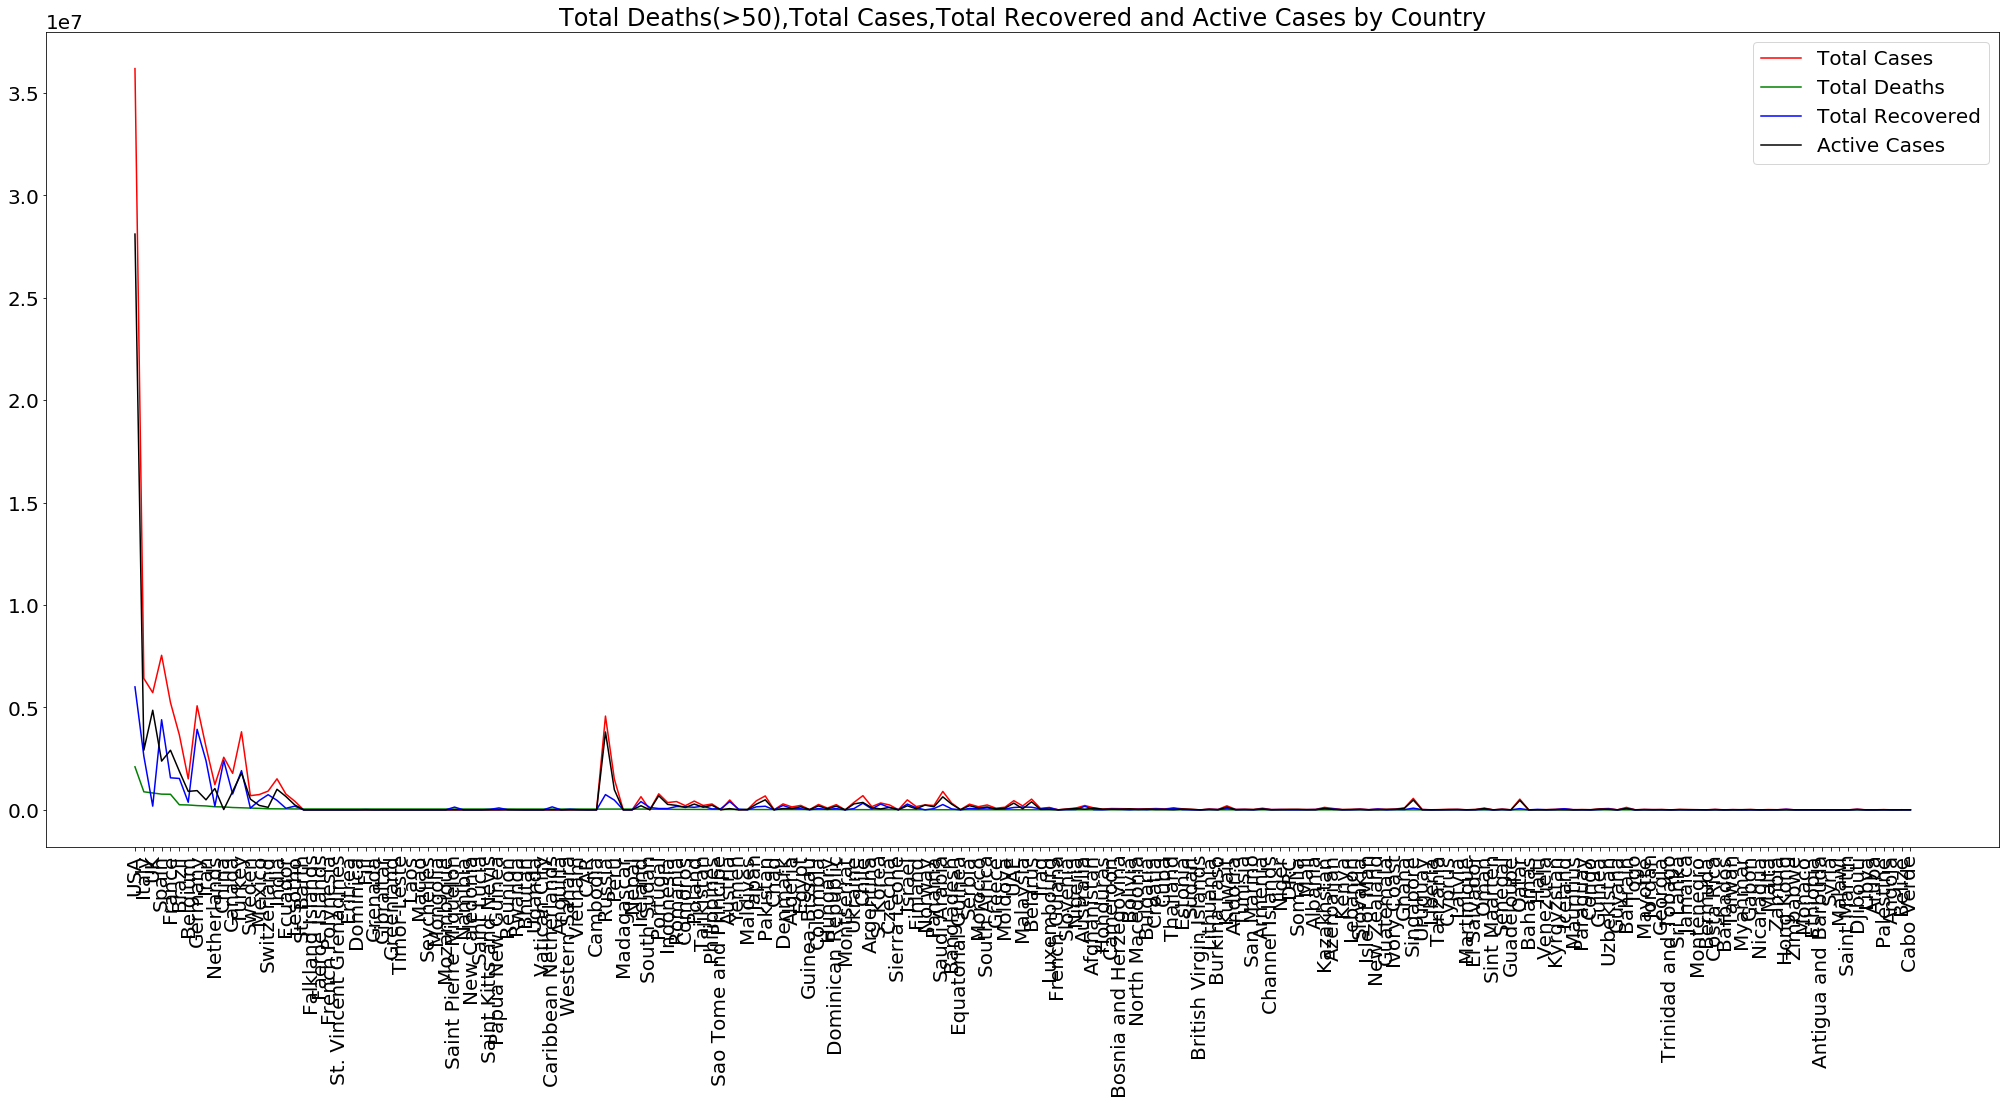

In [141]:
r_data = worldometer_df.groupby(["Country"])["Total Cases", "Total Deaths","Total Recovered","Active Cases"].sum().reset_index()
r_data = r_data.sort_values(by='Total Deaths', ascending=False)
r_data = r_data[r_data['Total Deaths']>50]
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
plt.plot(r_data['Country'], r_data['Total Cases'],color='red',label="Total Cases")
plt.plot(r_data['Country'], r_data['Total Deaths'],color='green',label="Total Deaths")
plt.plot(r_data['Country'], r_data['Total Recovered'], color='blue',label="Total Recovered")
plt.plot(r_data['Country'], r_data['Active Cases'], color='black',label="Active Cases")
plt.title('Total Deaths(>50),Total Cases,Total Recovered and Active Cases by Country')
leg = plt.legend(fontsize=20)
plt.rcParams["font.size"] = "20"
plt.show()

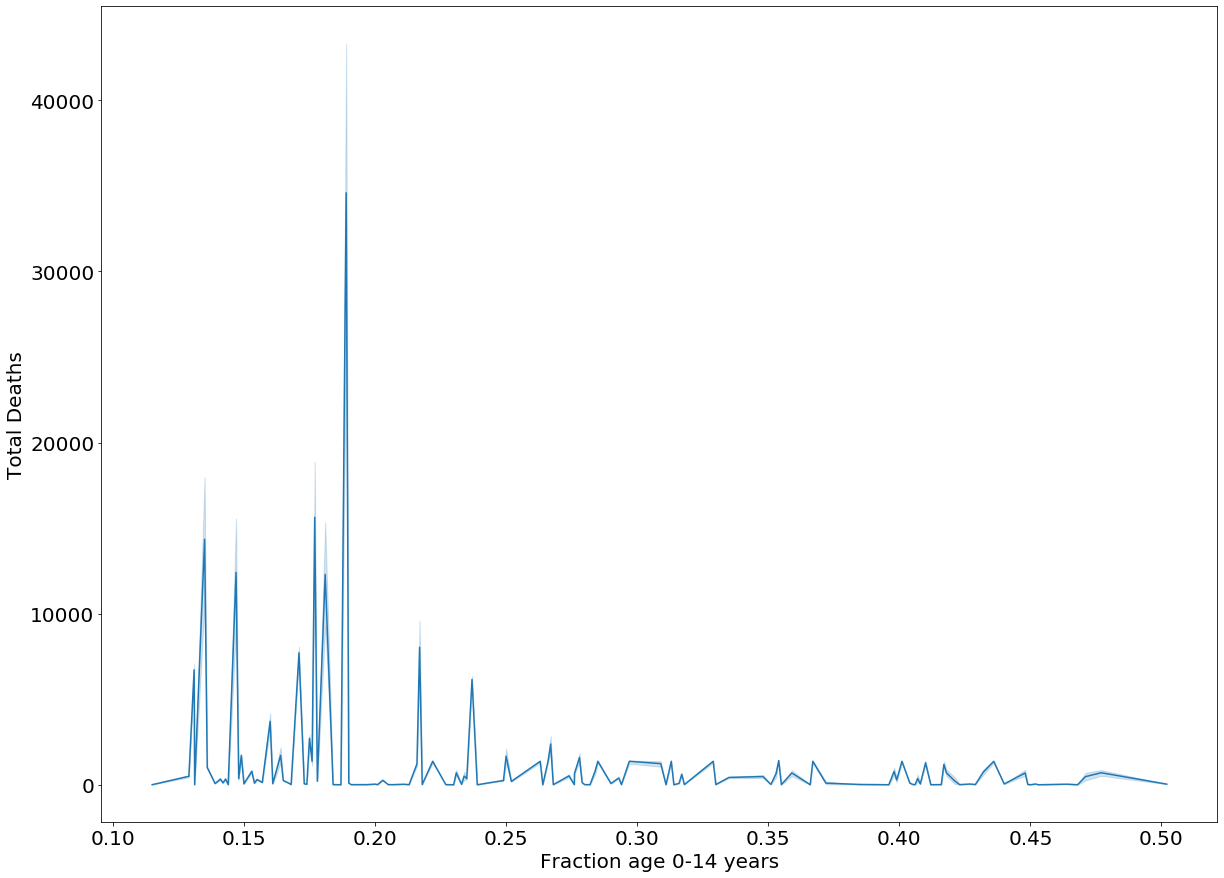

In [142]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 0-14 years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

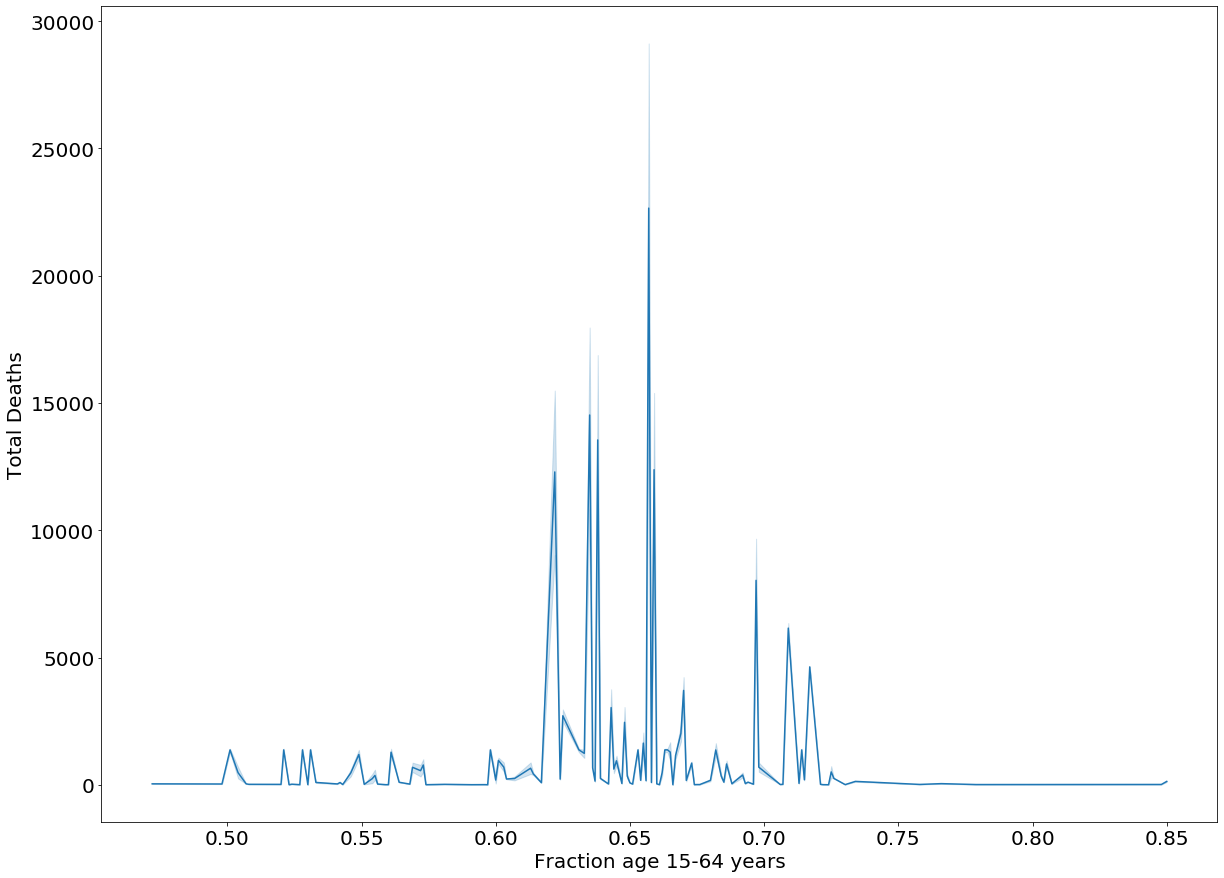

In [143]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 15-64 years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

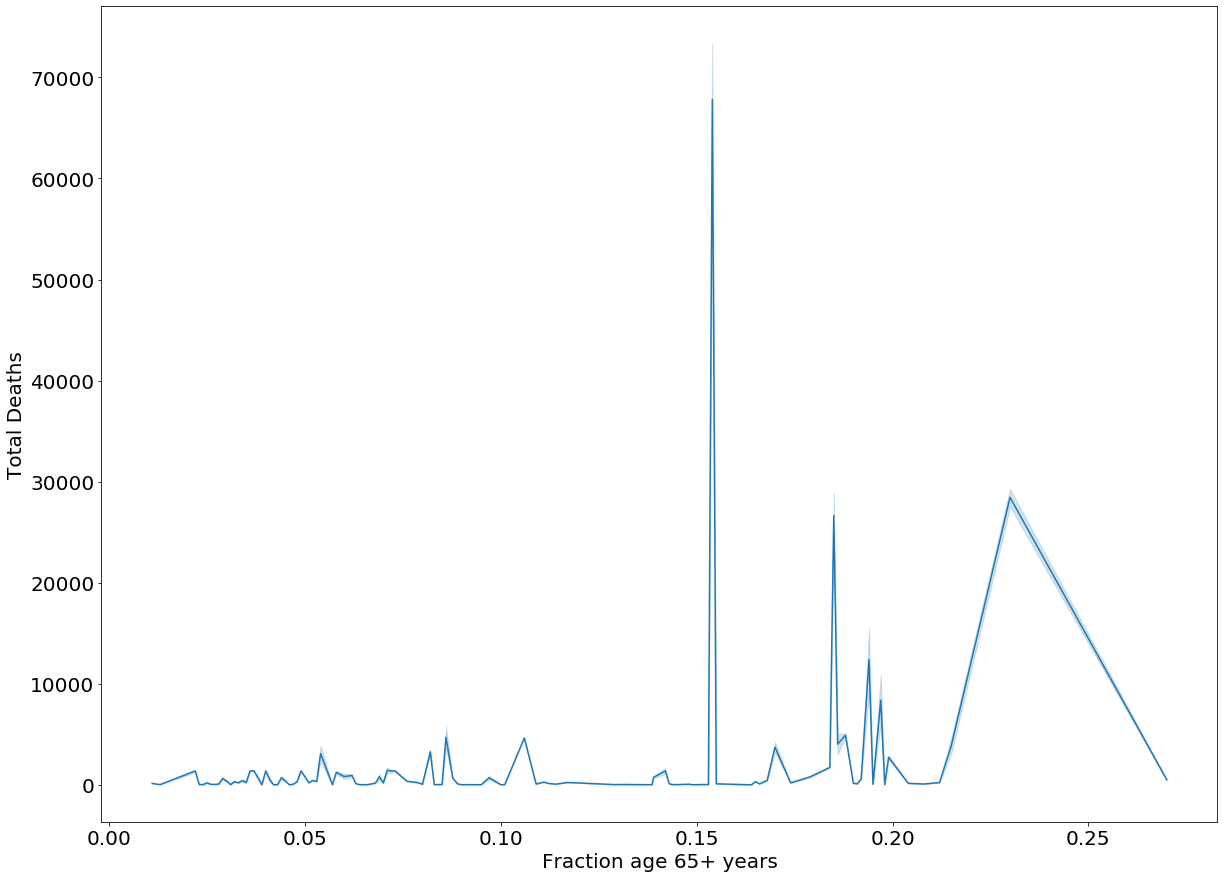

In [144]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 65+ years'],y=worldometer_df['Total Deaths'],data=worldometer_df)
plt.show()

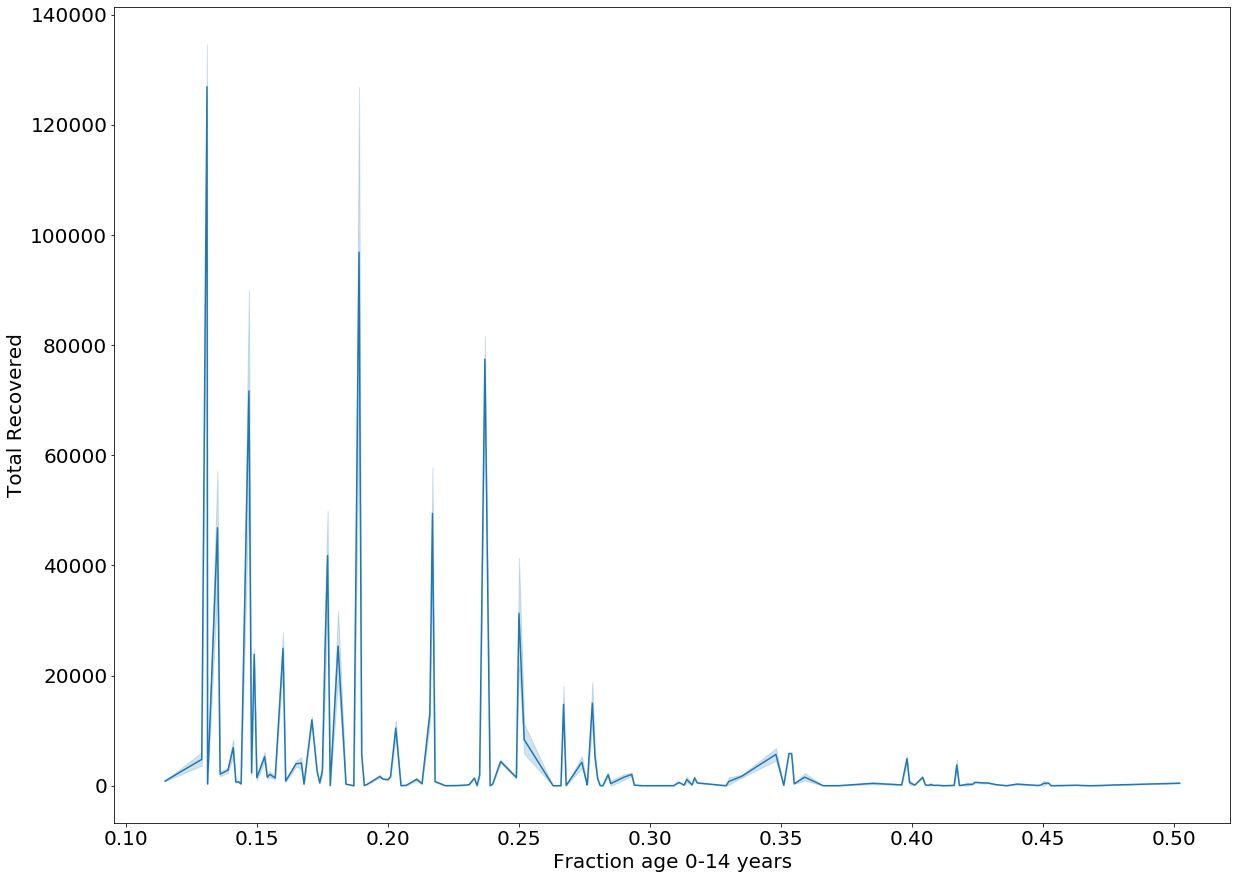

In [145]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 0-14 years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

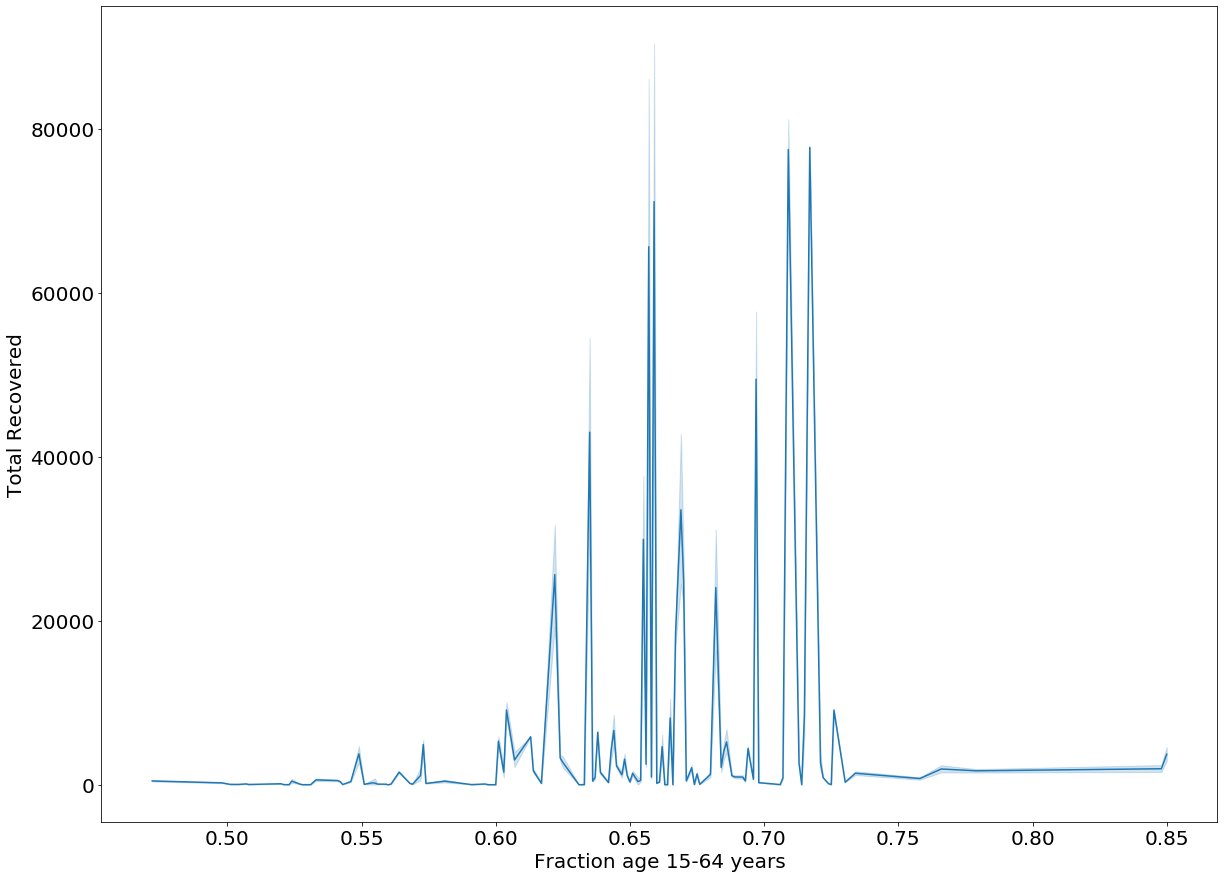

In [146]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 15-64 years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

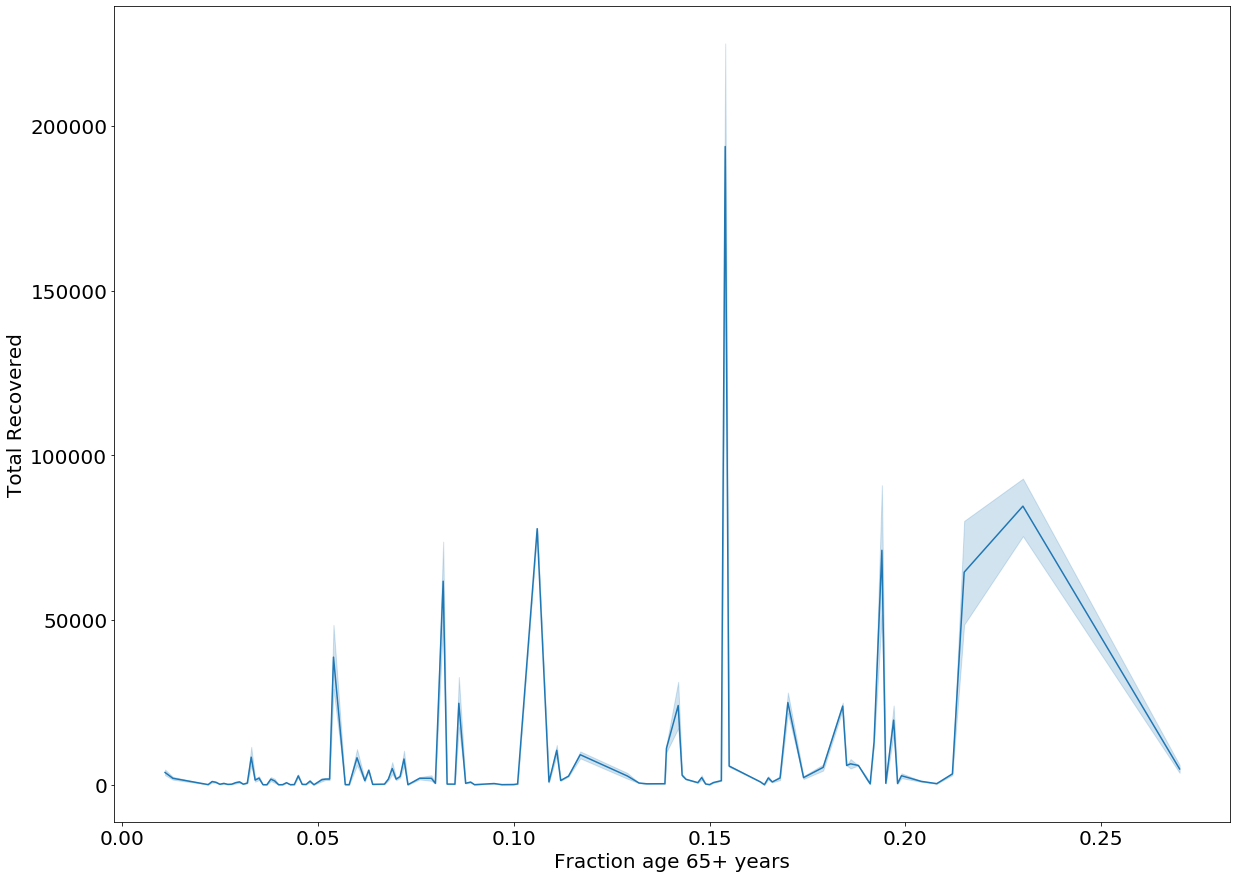

In [147]:
plt.figure(figsize=(20,15))
sns.lineplot(x=worldometer_df['Fraction age 65+ years'],y=worldometer_df['Total Recovered'],data=worldometer_df)
plt.show()

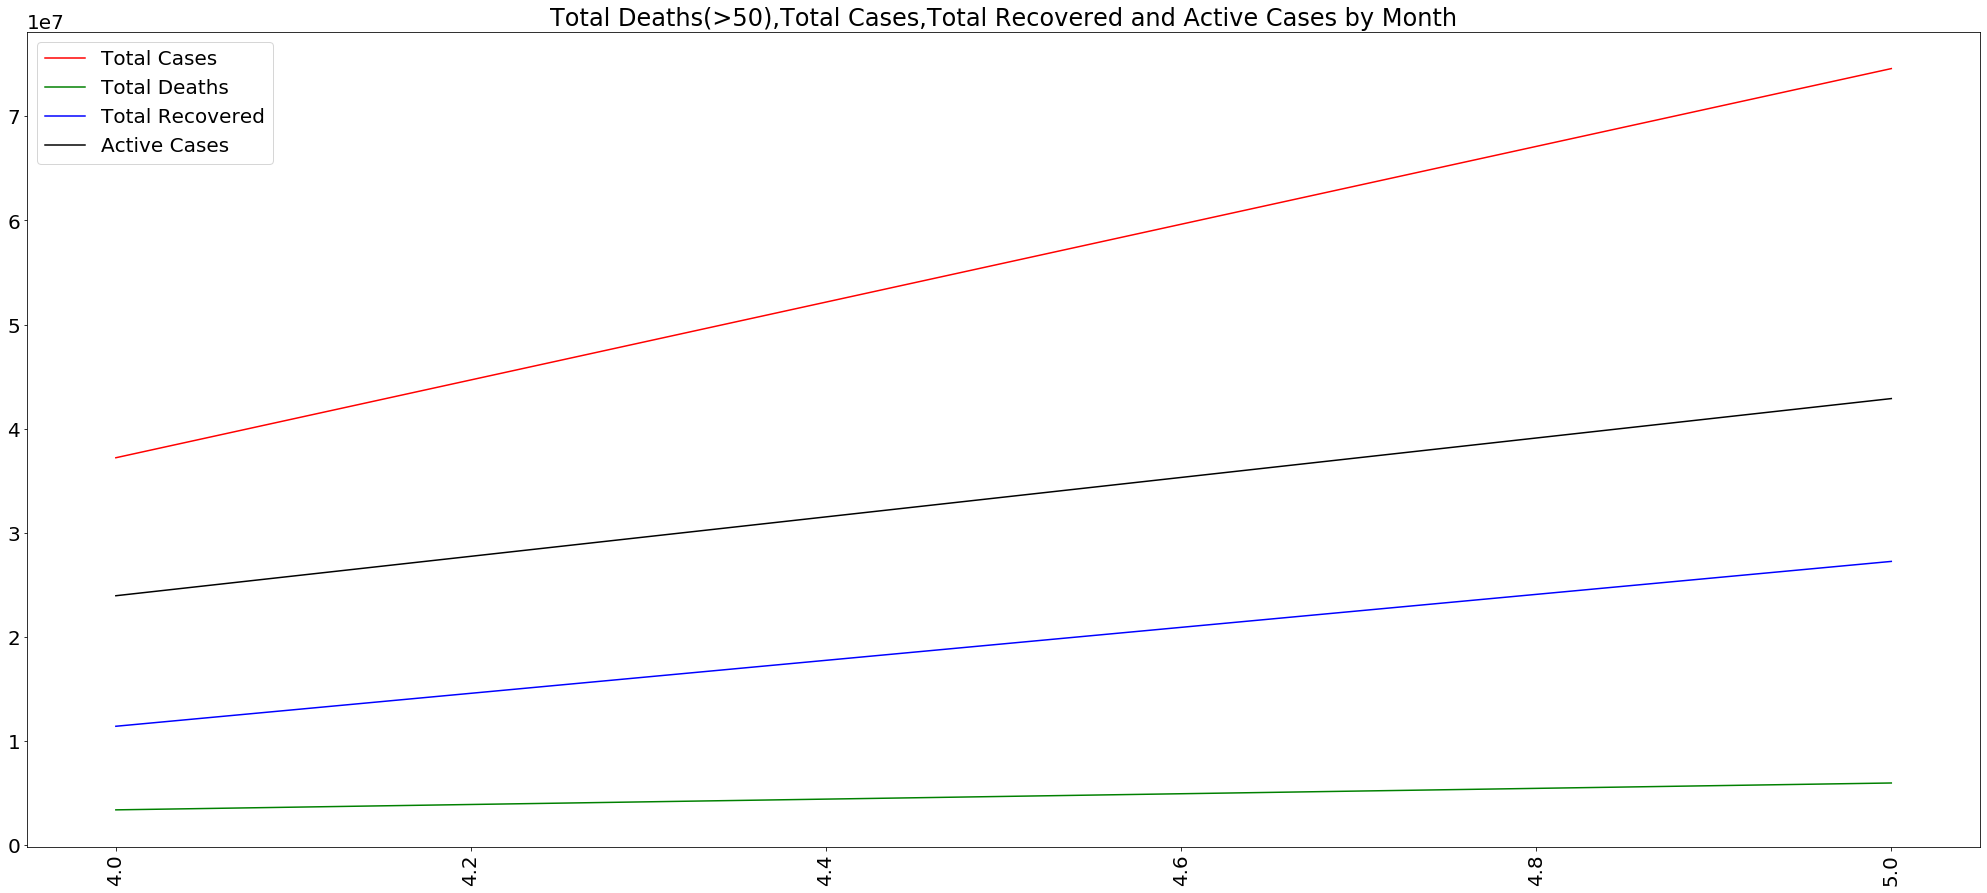

In [148]:
r_data = worldometer_df.groupby(["month"])["Total Cases", "Total Deaths","Total Recovered","Active Cases"].sum().reset_index()
r_data = r_data.sort_values(by='Total Deaths', ascending=False)
r_data = r_data[r_data['Total Deaths']>50]
plt.figure(figsize=(35,15))
plt.xticks(rotation=90)
plt.plot(r_data['month'], r_data['Total Cases'],color='red',label="Total Cases")
plt.plot(r_data['month'], r_data['Total Deaths'],color='green',label="Total Deaths")
plt.plot(r_data['month'], r_data['Total Recovered'], color='blue',label="Total Recovered")
plt.plot(r_data['month'], r_data['Active Cases'], color='black',label="Active Cases")
plt.title('Total Deaths(>50),Total Cases,Total Recovered and Active Cases by Month')
leg = plt.legend(fontsize=20)
plt.show()

In [149]:
worldometer_df.drop('Date',axis=1,inplace=True)

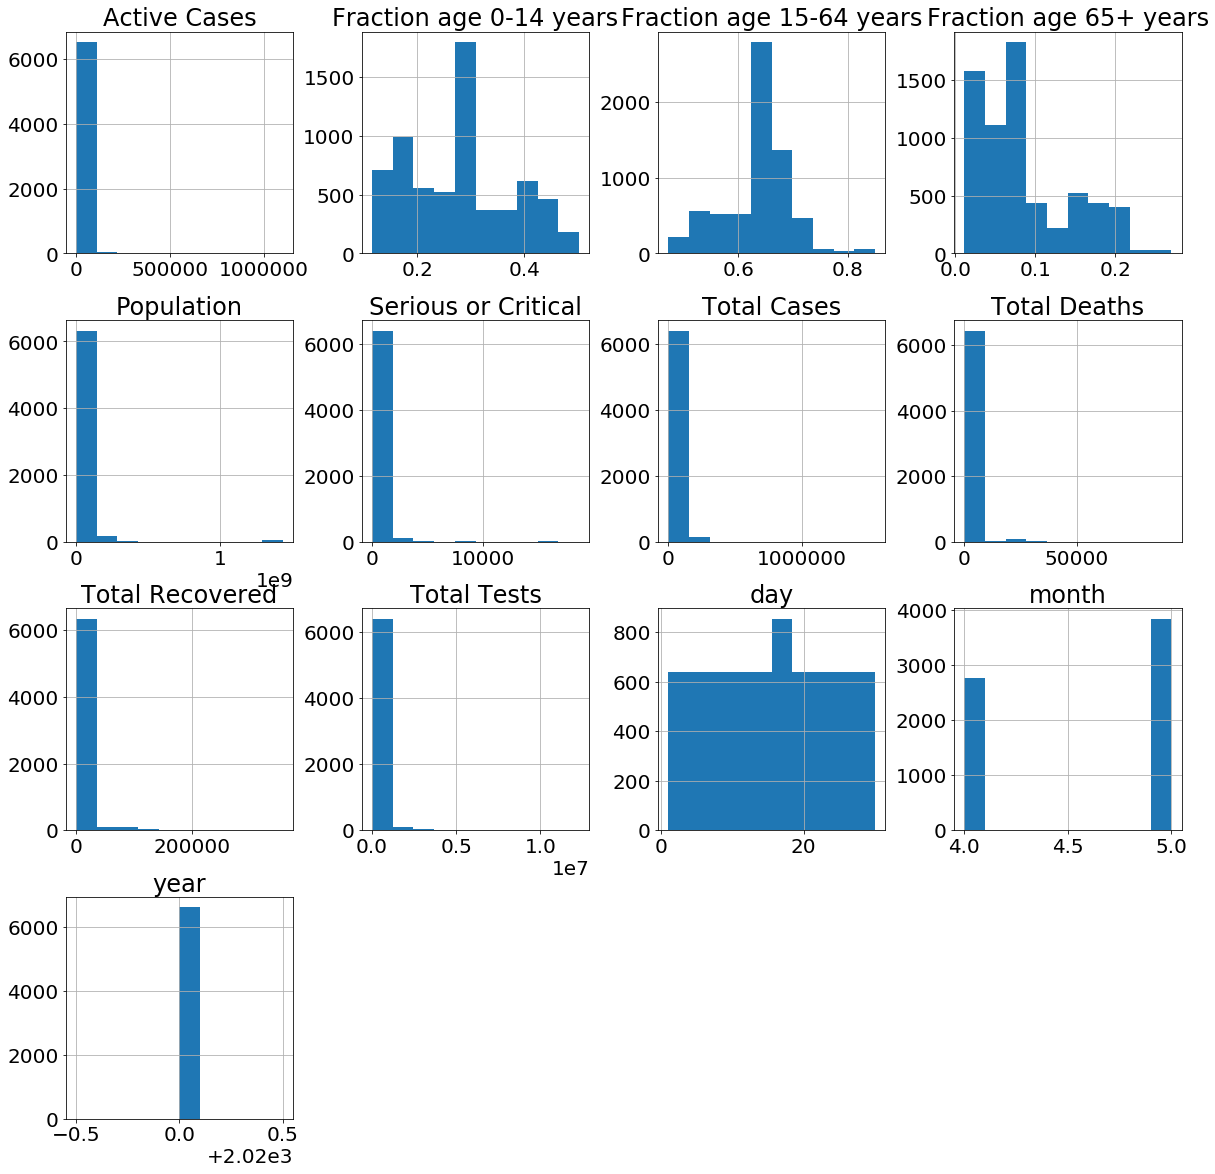

In [150]:
worldometer_df.hist(figsize=(20,20))
plt.show()

In [151]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
worldometer_df['Country']=le.fit_transform(worldometer_df['Country'])

In [152]:
worldometer_df

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,month,year,day
0,201,330774664,3.722145e+06,738792.0,39014.000000,68269.0,13551.00000,631509.0,0.189000,0.657000,0.154000,4,2020,18
1,201,330774664,3.861549e+06,763832.0,40553.000000,71003.0,13566.00000,652276.0,0.189000,0.657000,0.154000,4,2020,19
2,201,330774664,4.026360e+06,792759.0,42514.000000,72389.0,13951.00000,677856.0,0.189000,0.657000,0.154000,4,2020,20
3,201,330774664,4.187392e+06,818744.0,45318.000000,82923.0,14016.00000,690503.0,0.189000,0.657000,0.154000,4,2020,21
4,201,330774664,4.325342e+06,848717.0,47659.000000,84050.0,14016.00000,717008.0,0.189000,0.657000,0.154000,4,2020,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6598,165,5797,2.167252e+05,1.0,1416.252096,1.0,386.74836,0.0,0.276098,0.636109,0.087731,5,2020,14
6599,165,5797,2.167252e+05,1.0,1416.252096,1.0,386.74836,0.0,0.276098,0.636109,0.087731,5,2020,15
6600,165,5797,2.167252e+05,1.0,1416.252096,1.0,386.74836,0.0,0.276098,0.636109,0.087731,5,2020,16
6601,165,5797,2.167252e+05,1.0,1416.252096,1.0,386.74836,0.0,0.276098,0.636109,0.087731,5,2020,17


In [153]:
y = worldometer_df['Total Deaths']
df_x = worldometer_df.drop('Total Deaths', axis = 1)
print(df_x.shape)
print(y.shape)

(6603, 13)
(6603,)


In [154]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)
    return final_r_state

In [156]:
#lets use linear regression
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)



max r2 score corresponding to random state: 86 is 0.9716139708308361


In [157]:
#lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [158]:
#lets use KNN Regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)



max r2 score corresponding to random state: 81 is 0.8986625584051536


In [159]:
#lets check the mean r2 score of both linear regression model and knn regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for linear regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression : ',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print('\n\n Mean r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression : ',cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean r2 score for linear regression :  -5.504116120575171
Standard deviation in r2 score for Linear Regression :  4.405592493093758


 Mean r2 score for KNN Regression :  -1.9682839958736154
Standard deviation in r2 score for KNN Regression :  2.30606972326334


In [160]:
#lets check Lasso regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [161]:
#lets check max r2 score when we use lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)



max r2 score corresponding to random state: 99 is 0.9668804530147164


In [162]:
#lets use cross val score with lasso
print("Mean r2 score for lasso regression : ",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('standard deviation for lasso ragression : ',cross_val_score(lsreg,x,y,scoring='r2').std())

Mean r2 score for lasso regression :  -5.762665065896434
standard deviation for lasso ragression :  7.802613115522443


In [163]:
#now we will try to use gradient boosting technique
#for getting best set of parameter we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [164]:
#now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
print('Mean r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation r2 score for gradient boosting Regrssion : ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for gradient boosting Regrssion :  -0.15758786375477887
Standard Deviation r2 score for gradient boosting Regrssion :  0.07800026938337122


In [165]:
#lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)



max r2 score corresponding to random state: 99 is 0.9967374362569218


In [166]:
# we tried all the model and till now GradientBoosting regression is the best
#random state corresponding to highest r2_score is 99


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.30)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [167]:
#lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is :  429.0912160039695
r2_score is :  0.9967684033390599


In [168]:
#save best model i.e. GradientBoostingRegressor
import pickle
pickle.dump(gbr,open('covid_Deaths_prediction.pkl','wb'))

In [169]:
#open saved model for predicion
M=open('covid_Deaths_prediction.pkl','rb')
model=pickle.load(M)

In [170]:
#predict
result=pd.DataFrame(model.predict(x_test))

In [171]:
#save prediction
result.to_csv('covid_Deaths_prediction.csv')

***